## 1. Imports

In [3]:
import torch # Torch main framework
import torch.nn as nn # Used for getting the NN Layers
from torch.optim import Adam # Adam Optimizer
from torch.utils.data import Dataset, DataLoader # Dataset class and DataLoader for creatning the objects
from torchsummary import summary # Visualize the model layers and number of parameters
from sklearn.model_selection import train_test_split # Split the dataset (train, validation, test)
from sklearn.metrics import accuracy_score # Calculate the testing Accuracy
import matplotlib.pyplot as plt # Plotting the training progress at the end
import pandas as pd # Data reading and preprocessing
import numpy as np # Mathematical operations

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print (device) # detect the GPU if any, if not use CPU.


cpu


## 2. Dataset

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mssmartypants/rice-type-classification")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 888k/888k [00:53<00:00, 17.0kB/s]

Extracting files...
Path to dataset files: C:\Users\ADMIN\.cache\kagglehub\datasets\mssmartypants\rice-type-classification\versions\2


In [10]:
data_df = pd.read_csv("riceClassification.csv")

In [12]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [14]:
data_df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [16]:
data_df.drop(["id"],axis=1,inplace=True)

In [18]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [20]:
data_df["Class"].unique()

array([1, 0], dtype=int64)

In [22]:
data_df.shape

(18185, 11)

## 3 .Data Preprocessing

In [25]:
original_df = data_df.copy()
original_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [27]:
for column in data_df:
  data_df[column] = data_df[column]/data_df[column].abs().max()
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


## 4 .Data Splitting

In [31]:
x = np.array(data_df.iloc[:, :-1])
y = np.array(data_df.iloc[:, -1])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5)

In [33]:
print("training set is",x_train.shape[0],"row which is ", round(x_train.shape[0]/data_df.shape[0],4)*100,"%")   #4 means i need the 4 values after decimal
print("validation set is",x_val.shape[0],"row which is ", round(x_val.shape[0]/data_df.shape[0],4)*100,"%")
print("testing set is",x_test.shape[0],"row which is ", round(x_test.shape[0]/data_df.shape[0],4)*100,"%")



training set is 12729 row which is  70.0 %
validation set is 2728 row which is  15.0 %
testing set is 2728 row which is  15.0 %


## 5 .Dataset Object

In [36]:
class dataset(Dataset):
  def __init__(self, x,y):
    self.x = torch.tensor(x,dtype=torch.float32).to(device)
    self.y = torch.tensor(y,dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.x)

  def __getitem__(self,index):
    return self.x[index],self.y[index]
training_data = dataset(x_train,y_train)
testing_data = dataset(x_test,y_test)
validation_data = dataset(x_val,y_val)

## 6 . Training Hyper Parameters

In [39]:
BATCH_SIZE = 32
EPOCHS = 10
HIDDEN_NEURONS = 10
LR = 1e-3

## 7. Data Loaders

In [42]:
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle= True)
validation_dataloader = DataLoader(validation_data, batch_size=BATCH_SIZE, shuffle= True)
testing_dataloader = DataLoader(testing_data, batch_size=BATCH_SIZE, shuffle= True)

## 8. Model Class

In [46]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(x.shape[1],HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x=self.input_layer(x)
    x=self.linear(x)
    x=self.sigmoid(x)
    return x



## 9. Model Creation

In [50]:
model = MyModel().to(device)
summary(model, (x.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## 10. Loss and Optimizer

In [53]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(),lr=LR)

## 11. Training

In [56]:

total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

for epoch in range(EPOCHS):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    ## Training and Validation
    for data in train_dataloader:
      inputs,labels = data
      prediction = model(inputs).squeeze(1)

      batch_loss = criterion(prediction,labels)
      total_loss_train += batch_loss.item()
      acc = ((prediction).round() == labels).sum().item()
      total_acc_train += acc



      batch_loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    ## Validation
    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = criterion(prediction, labels)

            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc


    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    total_acc_train_plot.append(round(total_acc_train/(training_data.__len__())*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/(validation_data.__len__())*100, 4))

    print(f'''Epoch no. {epoch + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(training_data.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_data.__len__())*100):.4f}''')
    print("="*50)

Epoch no. 1 Train Loss: 0.2380 Train Accuracy: 79.7942 Validation Loss: 0.0372 Validation Accuracy: 97.1774
Epoch no. 2 Train Loss: 0.1097 Train Accuracy: 97.8003 Validation Loss: 0.0151 Validation Accuracy: 98.2038
Epoch no. 3 Train Loss: 0.0514 Train Accuracy: 98.2324 Validation Loss: 0.0088 Validation Accuracy: 98.5337
Epoch no. 4 Train Loss: 0.0337 Train Accuracy: 98.4052 Validation Loss: 0.0066 Validation Accuracy: 98.6437
Epoch no. 5 Train Loss: 0.0264 Train Accuracy: 98.4916 Validation Loss: 0.0054 Validation Accuracy: 98.6070
Epoch no. 6 Train Loss: 0.0226 Train Accuracy: 98.5702 Validation Loss: 0.0049 Validation Accuracy: 98.6804
Epoch no. 7 Train Loss: 0.0203 Train Accuracy: 98.5859 Validation Loss: 0.0044 Validation Accuracy: 98.7170
Epoch no. 8 Train Loss: 0.0191 Train Accuracy: 98.5309 Validation Loss: 0.0042 Validation Accuracy: 98.6804
Epoch no. 9 Train Loss: 0.0182 Train Accuracy: 98.5623 Validation Loss: 0.0040 Validation Accuracy: 98.6804
Epoch no. 10 Train Loss: 0.0

## 12. Testing

In [59]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion((prediction), labels)
    total_loss_test += batch_loss_test.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

print(f"Accuracy Score is: {round((total_acc_test/x_test.shape[0])*100, 2)}%")



Accuracy Score is: 98.61%


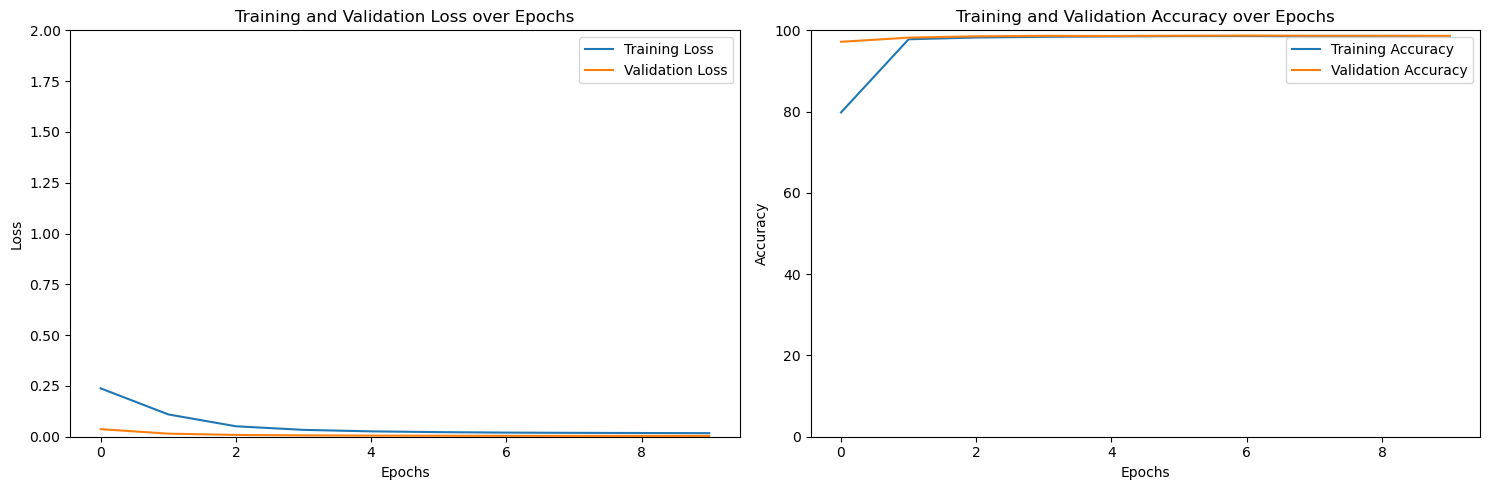

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_validation_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.tight_layout()

plt.show()

## 13. Inference

In [64]:
area = float(input("Area: "))/original_df['Area'].abs().max()
MajorAxisLength = float(input("Major Axis Length: "))/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = float(input("Minor Axis Length: "))/original_df['MinorAxisLength'].abs().max()
Eccentricity = float(input("Eccentricity: "))/original_df['Eccentricity'].abs().max()
ConvexArea = float(input("Convex Area: "))/original_df['ConvexArea'].abs().max()
EquivDiameter = float(input("EquivDiameter: "))/original_df['EquivDiameter'].abs().max()
Extent = float(input("Extent: "))/original_df['Extent'].abs().max()
Perimeter = float(input("Perimeter: "))/original_df['Perimeter'].abs().max()
Roundness = float(input("Roundness: "))/original_df['Roundness'].abs().max()
AspectRation = float(input("AspectRation: "))/original_df['AspectRation'].abs().max()

my_inputs = [area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]

print("="*20)
model_inputs = torch.Tensor(my_inputs).to(device)
prediction = (model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))

Area:  6431.279
Major Axis Length:  145.6
Minor Axis Length:  65.3
Eccentricity:  0.91
Convex Area:  6.56
EquivDiameter:  90.33
Extent:  0.85
Perimeter:  329.55
Roundness:  0.74
AspectRation:  2.55


tensor([0.9993], grad_fn=<SigmoidBackward0>)
Class is:  1
